In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:\\Users\\arti\\Desktop\\dataset\\imports.csv",names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'],na_values=['?'])

In [3]:
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [4]:
data.sample(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
120,1,154.0,plymouth,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6229.0
144,0,102.0,subaru,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82.0,4800.0,24,25,9233.0
140,2,83.0,subaru,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7603.0
161,0,91.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,8358.0
23,1,118.0,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,7957.0
126,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845.0
185,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,8195.0
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
19,1,98.0,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6295.0


In [5]:
pd.set_option('display.max_columns',28)
pd.set_option('display.min_rows',5)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# fill missing value in numeric column

In [9]:
data_missing=data.isnull().sum()/data.shape[0]*100

In [10]:
data_missing

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [11]:
data_missing_20=data_missing[data_missing>20].keys()
data_missing_20

Index([], dtype='object')

In [12]:
df3_num = data.select_dtypes(include=[ 'int64','float64'])
df3_num

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


<AxesSubplot:>

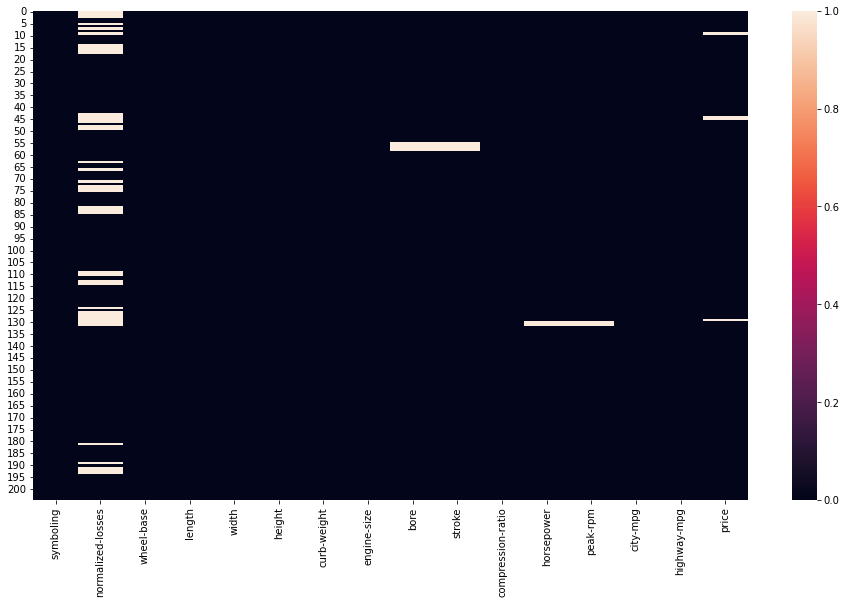

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df3_num.isnull())

In [14]:
df3_num[df3_num.isnull().any(axis=1)]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,110.0,197.0,70.9,56.3,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [15]:
df3_num.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [16]:
missing_num_var=[var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

In [17]:
df4_num_mean=df3_num.fillna(df3_num.mean())
df4_num_mean

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [18]:
df4_num_mean.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

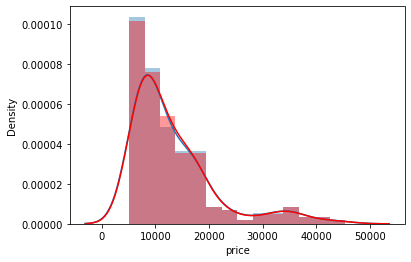

In [19]:
sns.distplot(df3_num['price'])
sns.distplot(df4_num_mean['price'],color='red')


C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

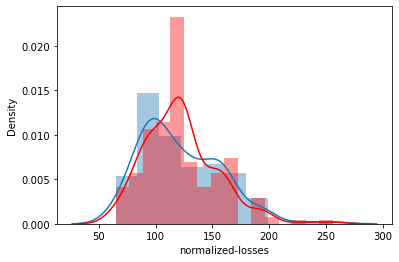

In [20]:
sns.distplot(df3_num['normalized-losses'])
sns.distplot(df4_num_mean['normalized-losses'],color='red')


C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bore', ylabel='Density'>

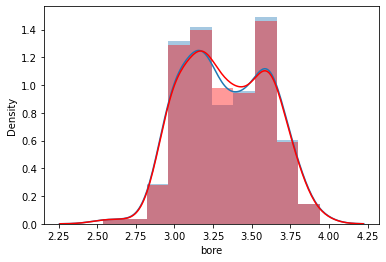

In [21]:
sns.distplot(df3_num['bore'])
sns.distplot(df4_num_mean['bore'],color='red')

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

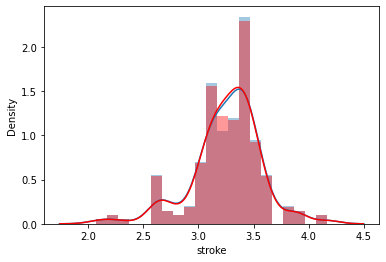

In [22]:
sns.distplot(df3_num['stroke'])
sns.distplot(df4_num_mean['stroke'],color='red')

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

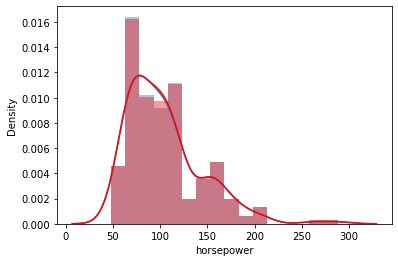

In [23]:
sns.distplot(df3_num['horsepower'])
sns.distplot(df4_num_mean['horsepower'],color='red')

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='peak-rpm', ylabel='Density'>

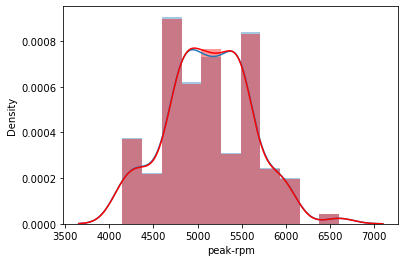

In [24]:
sns.distplot(df3_num['peak-rpm'])
sns.distplot(df4_num_mean['peak-rpm'],color='red')

In [25]:
df4_num_mean.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='symboling', ylabel='Density'>

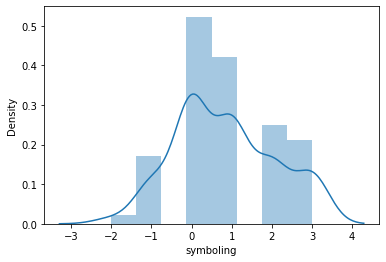

In [26]:
#sns.boxplot(df3_num['symboling'])
#sns.boxplot(df4_num_mean['symboling'],color='red')
sns.distplot(df3_num['symboling'])

# fill missing value in catagorical columns

In [28]:
cat_data=data.select_dtypes(include='object')
cat_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi
204,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi


In [29]:
cat_data.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [30]:
cat_data.isnull().mean()*100

make                0.00000
fuel-type           0.00000
aspiration          0.00000
num-of-doors        0.97561
body-style          0.00000
drive-wheels        0.00000
engine-location     0.00000
engine-type         0.00000
num-of-cylinders    0.00000
fuel-system         0.00000
dtype: float64

In [31]:
per_null=cat_data.isnull().mean()*100
miss_var=per_null[per_null>0].keys()
miss_var

Index(['num-of-doors'], dtype='object')

In [32]:
cat_data['num-of-doors'].mode()

0    four
dtype: object

In [33]:
cat_data['num-of-doors'].fillna(cat_data['num-of-doors'].mode()[0],inplace=True)

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
cat_data.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num-of-doors', ylabel='count'>

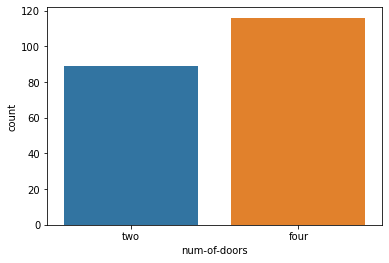

In [35]:
sns.countplot(cat_data['num-of-doors'])
#sns.countplot(data['num-of-doors'])

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num-of-doors', ylabel='count'>

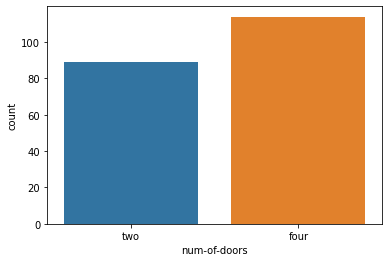

In [36]:
sns.countplot(data['num-of-doors'])

In [37]:
cat_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi
204,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi


In [38]:
dummy_df=pd.get_dummies(cat_data, drop_first = True)

In [39]:
dummy_df.shape

(205, 50)

In [40]:
df2=pd.concat([df4_num_mean,dummy_df],axis=1)
df2

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,...,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0
204,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [41]:
df2[df2.isnull().any(axis=1)].head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,...,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [42]:
x= df2.drop(columns='price', axis=1)

In [43]:
x

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,...,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0
204,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [45]:
y=df2['price']

In [46]:
y

0      13495.0
1      16500.0
        ...   
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x_train.shape,y_train.shape

((164, 65), (164,))

In [49]:
x_test.shape,y_test.shape

((41, 65), (41,))

In [50]:
scaler=StandardScaler()
x_train_new=scaler.fit_transform(x_train)
x_test_new=scaler.transform(x_test)

In [51]:
x_train_new

array([[-0.72738032, -0.04744346,  1.03708546, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [-0.72738032,  1.14255003,  1.54123134, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [-0.72738032, -1.42051286, -0.50896191, ..., -0.95235327,
        -0.19487094, -0.07832604],
       ...,
       [ 0.07863571, -0.04744346, -0.71062026, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [ 1.69066776,  2.24100555,  0.70098821, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [-0.72738032, -0.4746206 ,  0.28086664, ...,  1.05003052,
        -0.19487094, -0.07832604]])

In [52]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [53]:
lr.fit(x_train_new,y_train)
dt.fit(x_train_new,y_train)
knn.fit(x_train_new,y_train)



KNeighborsRegressor()

In [54]:
y_pred1=lr.predict(x_test_new)
y_pred2=lr.predict(x_test_new)
y_pred3=lr.predict(x_test_new)

In [55]:
print('lr',r2_score(y_test,y_pred1))
print('dt',r2_score(y_test,y_pred2))
print('knn',r2_score(y_test,y_pred3))

lr 0.8901772233727674
dt 0.8901772233727674
knn 0.8901772233727674


In [56]:
from sklearn.ensemble import BaggingRegressor

In [57]:
bag_reg=BaggingRegressor(random_state=42)
bag_reg.fit(x_train_new,y_train)

BaggingRegressor(random_state=42)

In [58]:
y_pred=bag_reg.predict(x_test_new)

In [59]:
print(r2_score(y_test,y_pred))

0.9330325124419532
